In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-18.317773982028, 26.858126525301998),
 (-88.4883662218538, 35.60150538040358),
 (-44.65770473534851, 19.086936404308716),
 (12.551523588782999, 129.78997366121547),
 (53.00074603659462, 169.94107434771047),
 (84.10035228796335, 53.19967772991035),
 (51.91534653494125, -69.11693839852245),
 (-23.214456099893837, -33.731281241432924),
 (-0.01703976948573427, 94.03447128532531),
 (-67.94127481054238, -66.21899366233876),
 (17.562638100322346, 34.723787887379984),
 (-9.070640135168318, 66.31984294759155),
 (-86.26693220585736, -34.869750169990425),
 (-67.87764060618153, -167.30712324562361),
 (-33.32057729255682, 140.38422553070592),
 (16.001005981246465, 76.07152076721928),
 (34.129658170435974, 3.5174877493005567),
 (-20.77417264146095, -171.60747854514955),
 (-10.693804597358323, 132.90075998842025),
 (54.539694455851276, -114.689208467426),
 (13.381771000461313, -66.18905344463056),
 (-29.26915352752369, -29.10324928093914),
 (85.79294164741574, -115.61132363676491),
 (81.4848281019

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
cities

['yertsevo',
 'hermanus',
 'juneau',
 'porto empedocle',
 'cabanas',
 'margate',
 'taolanaro',
 'hithadhoo',
 'punta arenas',
 'rikitea',
 'jinchang',
 'mabaruma',
 'santa maria',
 'ust-nera',
 'mataura',
 'ewa beach',
 'busselton',
 'acapulco',
 'narsaq',
 'norman wells',
 'san jose',
 'floresti',
 'la seyne-sur-mer',
 'ahipara',
 'bethel',
 'hilo',
 'tallahassee',
 'zheleznodorozhnyy',
 'chokurdakh',
 'ushuaia',
 'albany',
 'puerto ayora',
 'cayenne',
 'ribeira grande',
 'luderitz',
 'qaqortoq',
 'zarate',
 'tuatapere',
 'east london',
 'cape town',
 'saint george',
 'faanui',
 'kamenskoye',
 'nikolskoye',
 'lebu',
 'khatanga',
 'kyaukse',
 'butaritari',
 'marienburg',
 'yemelyanovo',
 'saskylakh',
 'bluff',
 'saldanha',
 'cherskiy',
 'yulara',
 'wahran',
 'tuktoyaktuk',
 'iracoubo',
 'bo phloi',
 'kapaa',
 'victoria point',
 'baykit',
 'jamestown',
 'tyrma',
 'mporokoso',
 'kalmar',
 'esperance',
 'attawapiskat',
 'vila franca do campo',
 'upernavik',
 'khromtau',
 'cururupu',
 'mur

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a23c656830ed1963d70c1a5999db49b2


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | punta arenas
Processing Record 2 of Set 12 | east london
Processing Record 3 of Set 12 | uyemskiy
Processing Record 4 of Set 12 | georgetown
Processing Record 5 of Set 12 | kendari
Processing Record 6 of Set 12 | munsingen
Processing Record 7 of Set 12 | avarua
Processing Record 8 of Set 12 | benguela
Processing Record 9 of Set 12 | rikitea
Processing Record 10 of Set 12 | tateyama
Processing Record 11 of Set 12 | kushmurun
Processing Record 12 of Set 12 | toamasina
Processing Record 13 of Set 12 | olinda
Processing Record 14 of Set 12 | kapaa
Processing Record 15 of Set 12 | yellowknife
Processing Record 16 of Set 12 | yar-sale
Processing Record 17 of Set 12 | ushuaia
Processing Record 18 of Set 12 | mataura
Processing Record 19 of Set 12 | columbus
Processing Record 20 of Set 12 | hithadhoo
Processing Record 21 of Set 12 | sulangan
Processing Record 22 of Set 12 | remuna
Processing Record 23 o

Processing Record 32 of Set 15 | muros
Processing Record 33 of Set 15 | havoysund
Processing Record 34 of Set 15 | san cristobal
Processing Record 35 of Set 15 | saint george
Processing Record 36 of Set 15 | ponta do sol
Processing Record 37 of Set 15 | saint-philippe
Processing Record 38 of Set 15 | portland
Processing Record 39 of Set 15 | qaanaaq
Processing Record 40 of Set 15 | swinoujscie
Processing Record 41 of Set 15 | laguna
Processing Record 42 of Set 15 | ampanihy
Processing Record 43 of Set 15 | auki
Processing Record 44 of Set 15 | tatarsk
Processing Record 45 of Set 15 | howard springs
Processing Record 46 of Set 15 | klaksvik
Processing Record 47 of Set 15 | inhambane
Processing Record 48 of Set 15 | waipawa
Processing Record 49 of Set 15 | nueva gerona
Processing Record 50 of Set 15 | pisco
Processing Record 1 of Set 16 | la ronge
Processing Record 2 of Set 16 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 16 | geraldton
Processing Record 4 of Set 16 

Processing Record 19 of Set 19 | banon
Processing Record 20 of Set 19 | tir pol
City not found. Skipping...
Processing Record 21 of Set 19 | bandarbeyla
Processing Record 22 of Set 19 | christchurch
Processing Record 23 of Set 19 | kailua
Processing Record 24 of Set 19 | guryevsk
Processing Record 25 of Set 19 | mizan teferi
Processing Record 26 of Set 19 | vanavara
Processing Record 27 of Set 19 | hirado
Processing Record 28 of Set 19 | qurayyat
Processing Record 29 of Set 19 | mattru
Processing Record 30 of Set 19 | trapani
Processing Record 31 of Set 19 | ugoofaaru
Processing Record 32 of Set 19 | mhlume
Processing Record 33 of Set 19 | namatanai
Processing Record 34 of Set 19 | tampilisan
Processing Record 35 of Set 19 | marzuq
Processing Record 36 of Set 19 | smidovich
Processing Record 37 of Set 19 | ornskoldsvik
Processing Record 38 of Set 19 | phan rang
City not found. Skipping...
Processing Record 39 of Set 19 | oni
Processing Record 40 of Set 19 | shitanjing
Processing Record

Processing Record 8 of Set 23 | fairbanks
Processing Record 9 of Set 23 | azimur
City not found. Skipping...
Processing Record 10 of Set 23 | necochea
Processing Record 11 of Set 23 | itupiranga
Processing Record 12 of Set 23 | hisar
Processing Record 13 of Set 23 | mezhdurechensk
Processing Record 14 of Set 23 | batman
Processing Record 15 of Set 23 | haines junction
Processing Record 16 of Set 23 | sao felix do xingu
Processing Record 17 of Set 23 | canico
Processing Record 18 of Set 23 | saint anthony
Processing Record 19 of Set 23 | puerto narino
Processing Record 20 of Set 23 | suoyarvi
Processing Record 21 of Set 23 | pochutla
Processing Record 22 of Set 23 | henties bay
Processing Record 23 of Set 23 | tshikapa
Processing Record 24 of Set 23 | samarai
Processing Record 25 of Set 23 | alice springs
Processing Record 26 of Set 23 | quatre cocos
Processing Record 27 of Set 23 | mashhad
Processing Record 28 of Set 23 | caledon
Processing Record 29 of Set 23 | kieta
Processing Record

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,33.80,95,18,8.05,CL,2020-07-02 03:26:19
1,East London,-33.02,27.91,51.80,57,34,6.93,ZA,2020-07-02 03:26:43
2,Uyemskiy,64.47,40.85,59.00,93,75,4.47,RU,2020-07-02 03:35:26
3,Georgetown,5.41,100.34,87.80,70,20,8.05,MY,2020-07-02 03:35:27
4,Kendari,-3.94,122.50,83.43,62,51,5.88,ID,2020-07-02 03:35:27
5,Munsingen,48.41,9.50,61.00,98,69,1.01,DE,2020-07-02 03:35:27
6,Avarua,-21.21,-159.78,78.80,78,0,10.29,CK,2020-07-02 03:26:43
7,Benguela,-12.58,13.41,64.85,85,2,1.59,AO,2020-07-02 03:35:27
8,Rikitea,-23.12,-134.97,69.40,69,0,22.17,PF,2020-07-02 03:26:19
9,Tateyama,34.98,139.87,86.00,69,40,18.34,JP,2020-07-02 03:35:27


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-07-02 03:26:19,-53.15,-70.92,33.80,95,18,8.05
1,East London,ZA,2020-07-02 03:26:43,-33.02,27.91,51.80,57,34,6.93
2,Uyemskiy,RU,2020-07-02 03:35:26,64.47,40.85,59.00,93,75,4.47
3,Georgetown,MY,2020-07-02 03:35:27,5.41,100.34,87.80,70,20,8.05
4,Kendari,ID,2020-07-02 03:35:27,-3.94,122.50,83.43,62,51,5.88
...,...,...,...,...,...,...,...,...,...
531,Caledon,ZA,2020-07-02 03:36:13,-34.23,19.43,45.00,97,31,4.45
532,Kieta,PG,2020-07-02 03:26:23,-6.22,155.63,84.34,65,3,4.12
533,Arandis,NA,2020-07-02 03:36:14,-22.42,14.97,63.63,27,0,15.86
534,Sychevka,RU,2020-07-02 03:36:14,55.83,34.27,59.72,89,100,8.03


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

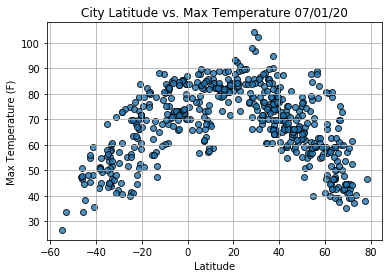

In [12]:
# Import the time module.
import time

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

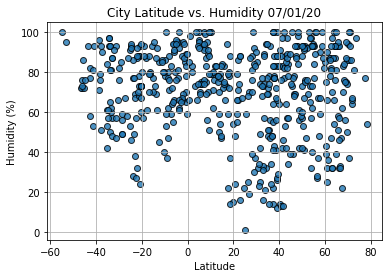

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

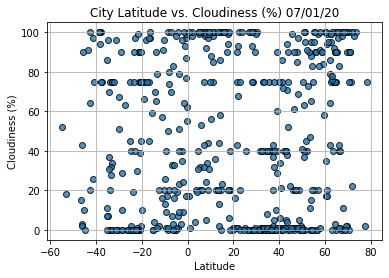

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

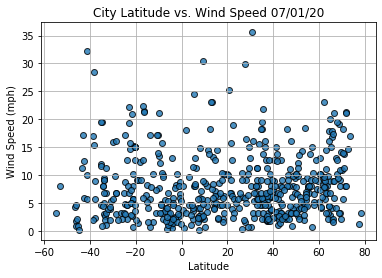

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2020-07-02 03:26:28
Lat                         22.08
Lng                       -159.32
Max Temp                     84.2
Humidity                       66
Cloudiness                      1
Wind Speed                  12.75
Name: 13, dtype: object

In [18]:
# filter the dataframe to get all Northern Hemisphere latitudes
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Uyemskiy,RU,2020-07-02 03:35:26,64.47,40.85,59.00,93,75,4.47
3,Georgetown,MY,2020-07-02 03:35:27,5.41,100.34,87.80,70,20,8.05
5,Munsingen,DE,2020-07-02 03:35:27,48.41,9.50,61.00,98,69,1.01
9,Tateyama,JP,2020-07-02 03:35:27,34.98,139.87,86.00,69,40,18.34
10,Kushmurun,KZ,2020-07-02 03:35:27,52.45,64.63,56.97,69,73,14.29
...,...,...,...,...,...,...,...,...,...
521,Saint Anthony,US,2020-07-02 03:21:49,45.02,-93.22,81.00,74,1,2.75
523,Suoyarvi,RU,2020-07-02 03:36:13,62.08,32.35,57.11,78,43,7.92
524,Pochutla,MX,2020-07-02 03:26:37,15.74,-96.47,82.00,75,100,2.35
530,Mashhad,IR,2020-07-02 03:36:13,36.30,59.61,78.80,24,0,4.70


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import Matplotlib.
import matplotlib.pyplot as plt

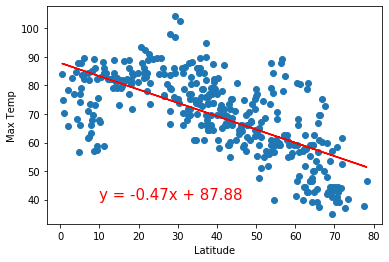

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature','Max Temp',(10,40))      



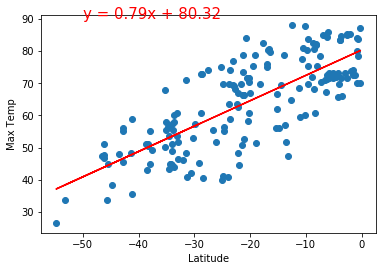

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

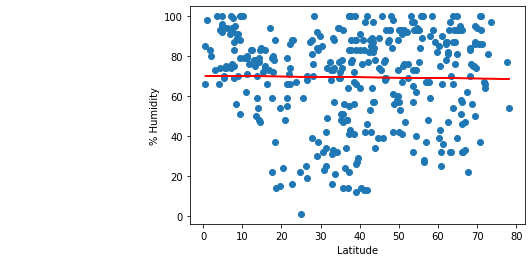

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(-50,60))

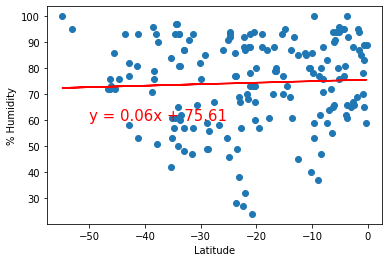

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,60))

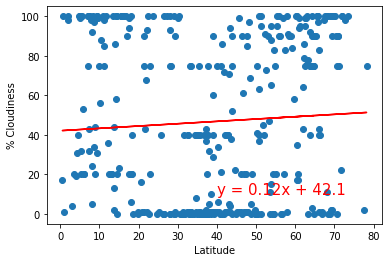

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

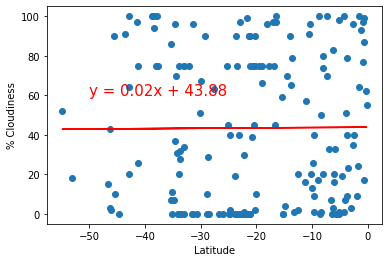

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

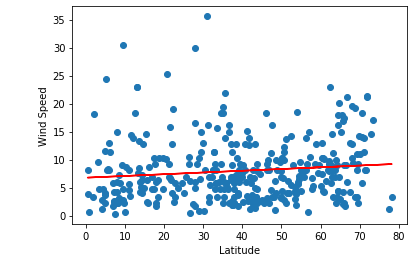

In [27]:
# Linear regression on the Northern Hemisphere - wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(-20,20))

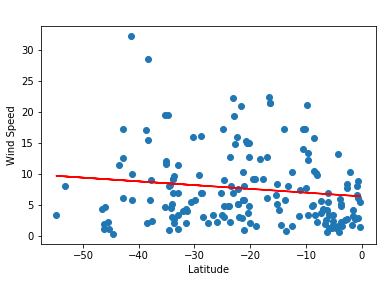

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))